Hola **Ian**!

Soy **Patricio Requena** 👋. Es un placer ser el revisor de tu proyecto el día de hoy!

Revisaré tu proyecto detenidamente con el objetivo de ayudarte a mejorar y perfeccionar tus habilidades. Durante mi revisión, identificaré áreas donde puedas hacer mejoras en tu código, señalando específicamente qué y cómo podrías ajustar para optimizar el rendimiento y la claridad de tu proyecto. Además, es importante para mí destacar los aspectos que has manejado excepcionalmente bien. Reconocer tus fortalezas te ayudará a entender qué técnicas y métodos están funcionando a tu favor y cómo puedes aplicarlos en futuras tareas. 

_**Recuerda que al final de este notebook encontrarás un comentario general de mi parte**_, empecemos!

Encontrarás mis comentarios dentro de cajas verdes, amarillas o rojas, ⚠️ **por favor, no muevas, modifiques o borres mis comentarios** ⚠️:


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si todo está perfecto.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si tu código está bien pero se puede mejorar o hay algún detalle que le hace falta.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario del revisor</b> <a class=“tocSkip”></a>
Si de pronto hace falta algo o existe algún problema con tu código o conclusiones.
</div>

Puedes responderme de esta forma:
<div class="alert alert-block alert-info">
    <b>Respuesta:</b> 

<div class="alert alert-block alert-warning">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

**Tip**: Para mejorar la presentación de tus notebooks te recomiendo siempre al inicio del mismo dejar un título y una breve introducción al proyecto para que sea claro desde el inicio lo que se realizará
</div>

# Paso 1. Descargar los datos

## Importar librerias

In [53]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, Ridge, LogisticRegression 
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split

## Data set

In [36]:
gym = pd.read_csv("/datasets/gym_churn_us.csv")

In [37]:
gym.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

In [38]:
gym.columns = gym.columns.str.lower()
gym = gym.rename(columns={"lifetime":"life_time"})
gym.head()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,life_time,avg_class_frequency_total,avg_class_frequency_current_month,churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


In [39]:
duplicados = gym.duplicated().sum()
print("Duplicados:",duplicados)
print("Valores nulos",gym.isna().sum())

Duplicados: 0
Valores nulos gender                               0
near_location                        0
partner                              0
promo_friends                        0
phone                                0
contract_period                      0
group_visits                         0
age                                  0
avg_additional_charges_total         0
month_to_end_contract                0
life_time                            0
avg_class_frequency_total            0
avg_class_frequency_current_month    0
churn                                0
dtype: int64


In [40]:
gym.describe()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,life_time,avg_class_frequency_total,avg_class_frequency_current_month,churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


In [41]:
print(gym.describe().T)

                                    count        mean        std        min  \
gender                             4000.0    0.510250   0.499957   0.000000   
near_location                      4000.0    0.845250   0.361711   0.000000   
partner                            4000.0    0.486750   0.499887   0.000000   
promo_friends                      4000.0    0.308500   0.461932   0.000000   
phone                              4000.0    0.903500   0.295313   0.000000   
contract_period                    4000.0    4.681250   4.549706   1.000000   
group_visits                       4000.0    0.412250   0.492301   0.000000   
age                                4000.0   29.184250   3.258367  18.000000   
avg_additional_charges_total       4000.0  146.943728  96.355602   0.148205   
month_to_end_contract              4000.0    4.322750   4.191297   1.000000   
life_time                          4000.0    3.724750   3.749267   0.000000   
avg_class_frequency_total          4000.0    1.87902

In [42]:
mean_by_churn = gym.groupby('churn').mean().T
print("--- VALORES MEDIOS POR GRUPO DE CHURN (0=Se quedó, 1=Se fue) ---")
print(mean_by_churn)

--- VALORES MEDIOS POR GRUPO DE CHURN (0=Se quedó, 1=Se fue) ---
churn                                       0           1
gender                               0.510037    0.510839
near_location                        0.873086    0.768143
partner                              0.534195    0.355325
promo_friends                        0.353522    0.183789
phone                                0.903709    0.902922
contract_period                      5.747193    1.728558
group_visits                         0.464103    0.268615
age                                 29.976523   26.989632
avg_additional_charges_total       158.445715  115.082899
month_to_end_contract                5.283089    1.662582
life_time                            4.711807    0.990575
avg_class_frequency_total            2.024876    1.474995
avg_class_frequency_current_month    2.027882    1.044546


<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Correcto, analizaste muy bien de manera inicial los datos con lo que trabajarás
</div>

In [43]:
binary_features = ['gender', 'near_location', 'partner', 'promo_friends', 
                   'phone', 'contract_period', 'group_visits', 'age', 'life_time']
numerical_features = ['age', 'avg_additional_charges_total', 'avg_class_frequency_total', 
                      'avg_class_frequency_current_month', 'month_to_end_contract']
gym['churn'] = gym['churn'].astype('category')

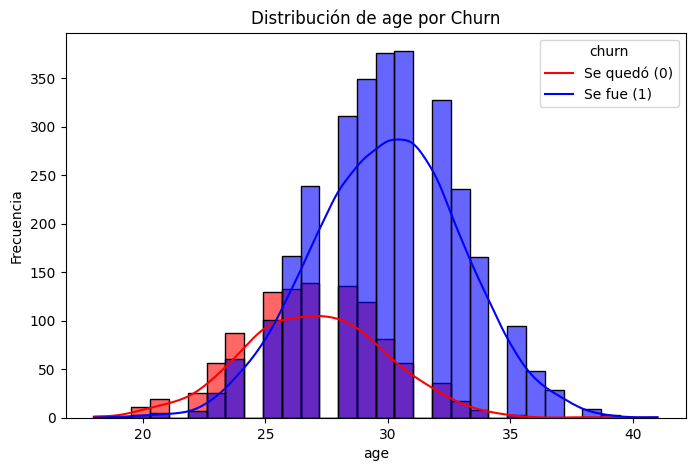

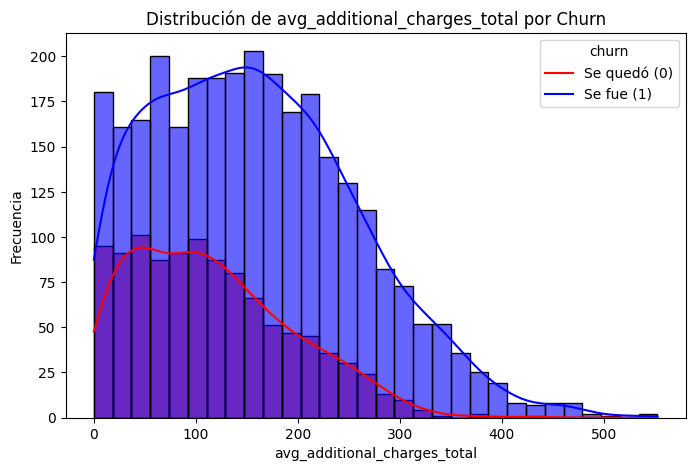

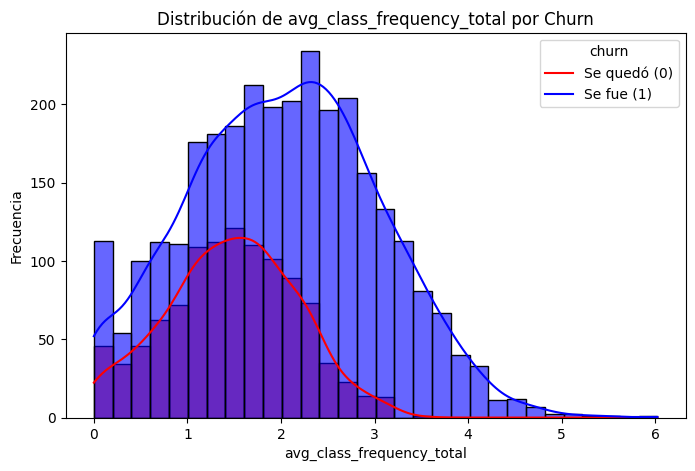

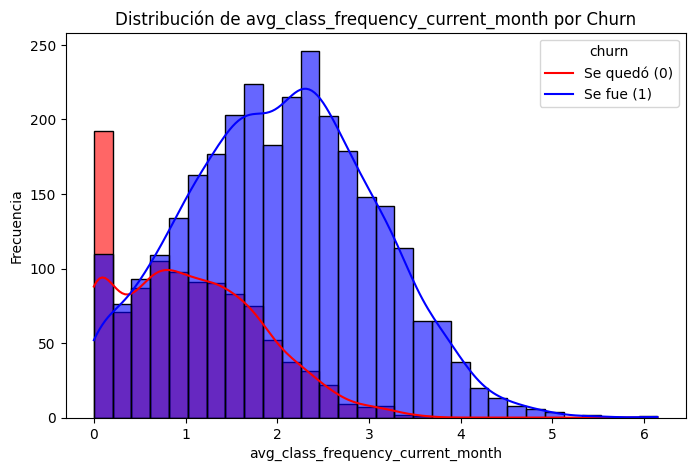

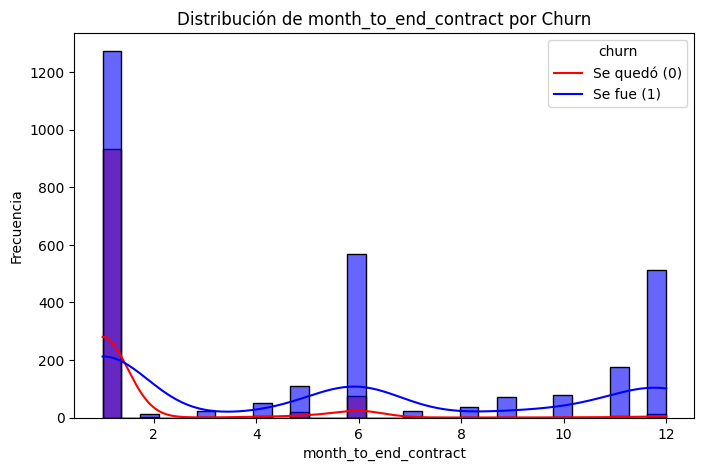

In [44]:
for feature in numerical_features:
    plt.figure(figsize=(8, 5))
    sns.histplot(
        data=gym, 
        x=feature, 
        hue="churn", 
        bins=30, 
        kde=True,
        palette=['blue', 'red'], 
        alpha=0.6)
    plt.title(f'Distribución de {feature} por Churn')
    plt.xlabel(feature)
    plt.ylabel('Frecuencia')
    plt.legend(title='churn', labels=['Se quedó (0)', 'Se fue (1)'])
    plt.show()

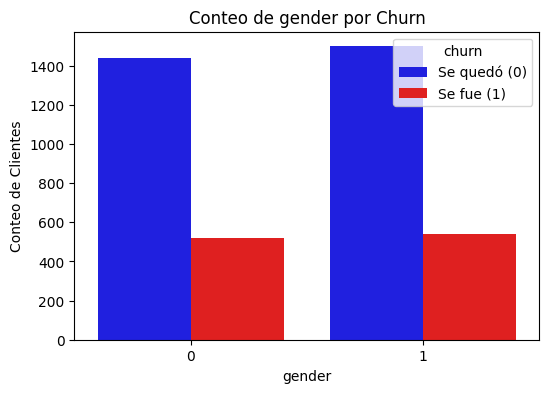

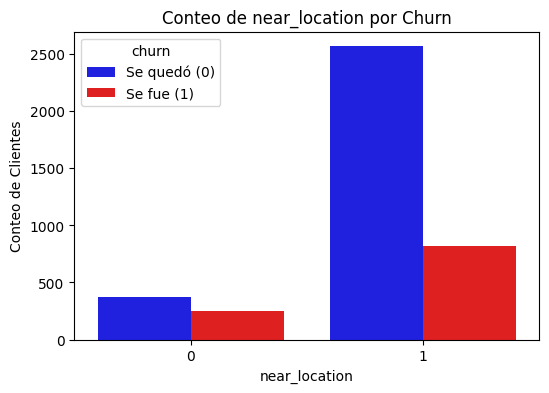

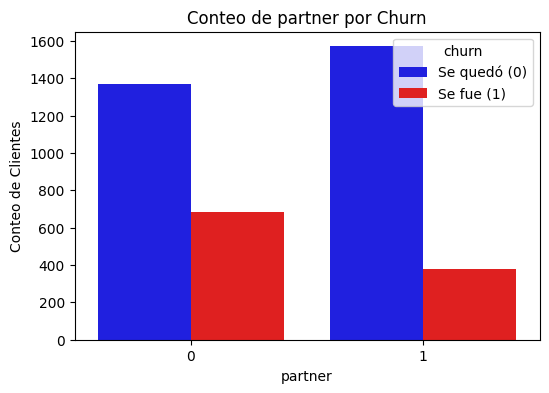

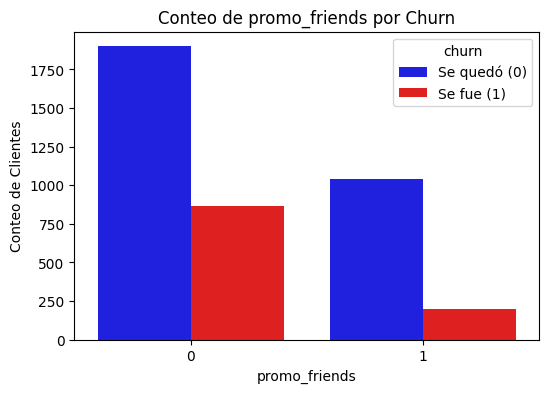

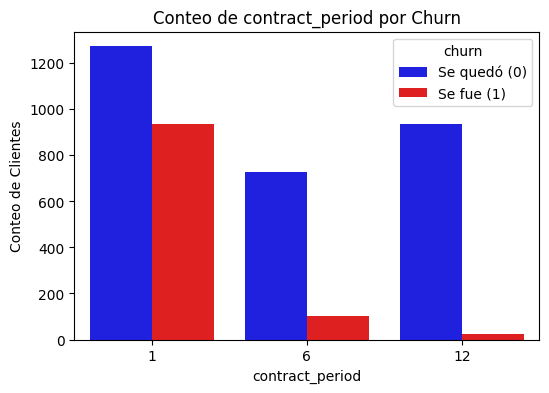

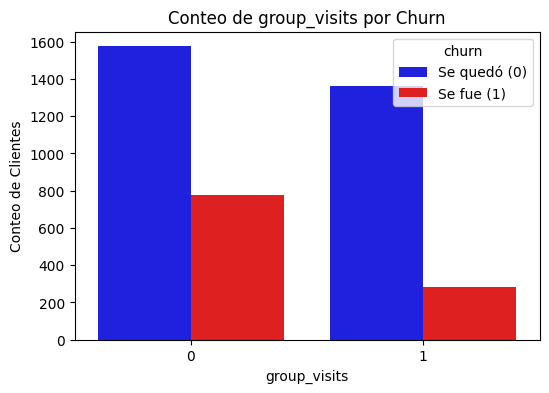

In [45]:
binary_influential = ['gender', 'near_location', 'partner', 'promo_friends', 
                      'contract_period', 'group_visits']
for feature in binary_influential:
    plt.figure(figsize=(6, 4))
    sns.countplot(
        data=gym, 
        x=feature, 
        hue="churn", 
        palette=['blue', 'red'])
    plt.title(f'Conteo de {feature} por Churn')
    plt.xlabel(feature)
    plt.ylabel('Conteo de Clientes')
    plt.legend(title='churn', labels=['Se quedó (0)', 'Se fue (1)'])
    plt.show()

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Muy bien hecho! Estas gráficas son muy claras para mostrar las diferencias entre cada variable de tu dataset
</div>

                                     gender  near_location   partner  \
gender                             1.000000       0.006699 -0.010463   
near_location                      0.006699       1.000000 -0.005119   
partner                           -0.010463      -0.005119  1.000000   
promo_friends                     -0.005033       0.210964  0.451960   
phone                             -0.008542      -0.015763  0.009970   
contract_period                    0.000502       0.150233  0.306166   
group_visits                       0.017879       0.154728  0.022710   
age                                0.013807       0.058358  0.047480   
avg_additional_charges_total      -0.009334       0.040761  0.022941   
month_to_end_contract             -0.001281       0.143961  0.294632   
life_time                          0.013579       0.070921  0.061229   
avg_class_frequency_total          0.014620       0.043127  0.024938   
avg_class_frequency_current_month  0.009156       0.062664  0.04

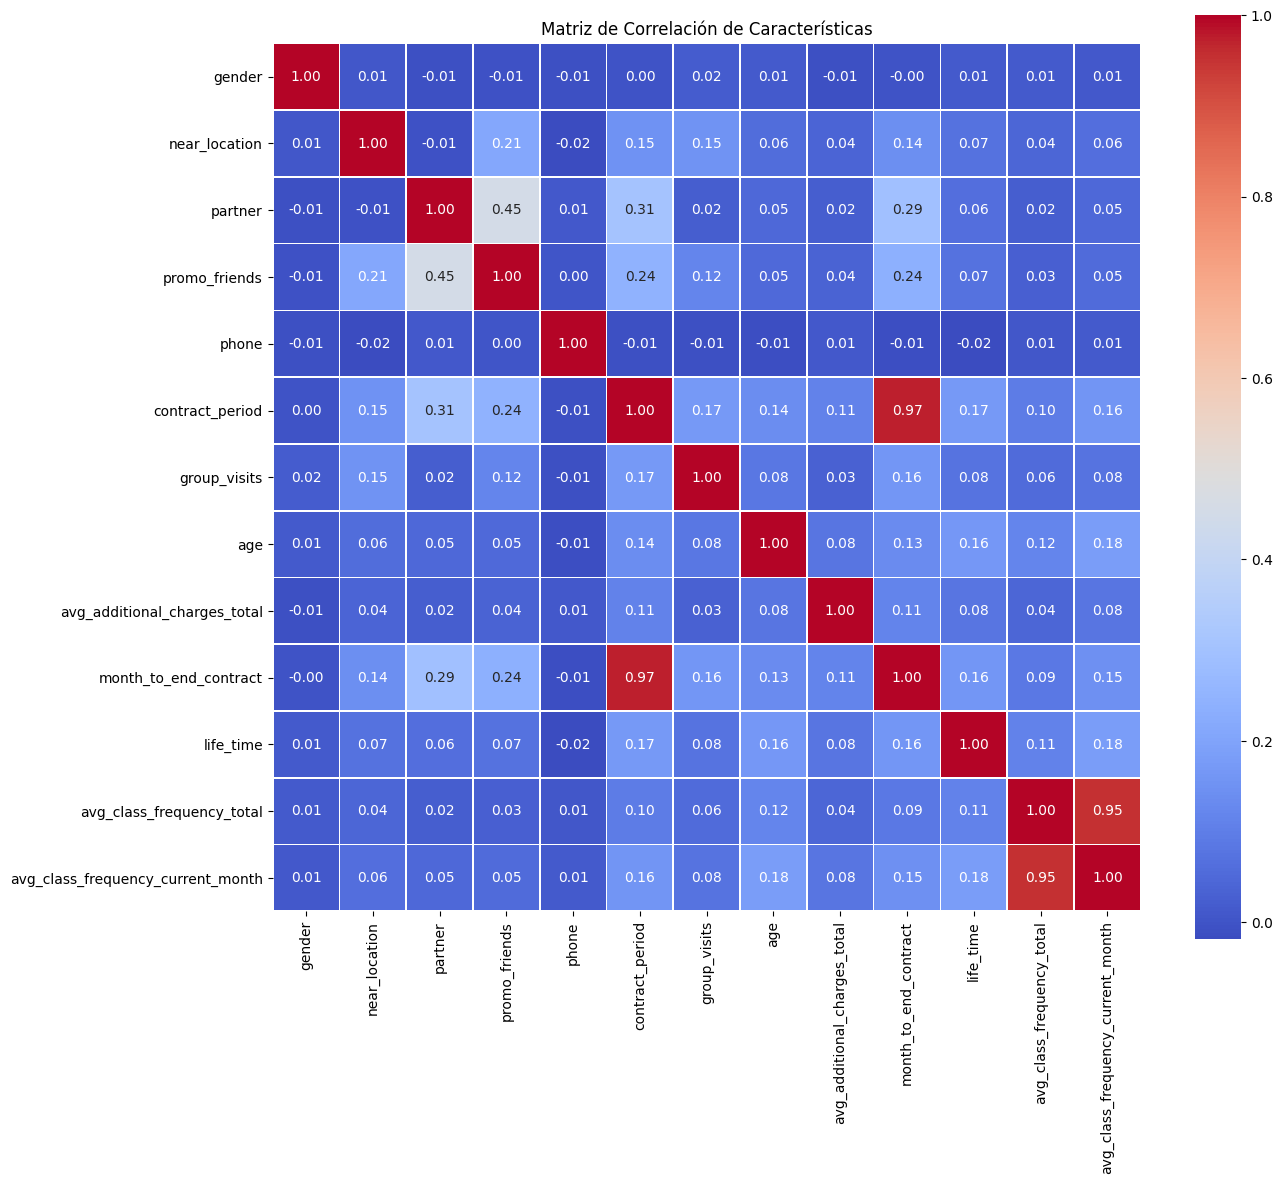

In [46]:
cm = gym.corr()
print(cm)
print("\n" + "-"*35 + "\n")
plt.figure(figsize=(14, 12))
sns.heatmap(
    cm, 
    annot=True,
    fmt='.2f',
    linewidths=.5,
    vmax=1,
    square=True,
    cmap='coolwarm')
plt.title('Matriz de Correlación de Características')
plt.show()

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Muy bien mostrada la matriz de correlación! Solo ten en cuenta que no siempre correlación significa causalidad, puede que en algunos casos tengas variables altamente correlacionadas pero no necesariamente son causa una de la otra

# Paso 3. Construir un modelo para predecir la cancelación de usuarios

In [47]:
X = gym.drop('churn', axis=1)
X = pd.get_dummies(X, columns=['gender'], drop_first=True)
y = gym['churn']
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=0.3,
    random_state=42,
    stratify=y)
print(f"Tamaño del conjunto de entrenamiento (X_train): {X_train.shape}")
print(f"Tamaño del conjunto de validación (X_test): {X_test.shape}")
def print_all_metrics(y_true, y_pred, model_name='Modelo'):
    print(f"\n--- Métricas de Evaluación para {model_name} ---")
    print(f'Precisión (Accuracy): {accuracy_score(y_true, y_pred):.4f}')
    print(f'Precisión (Precision): {precision_score(y_true, y_pred):.4f}')
    print(f'Exhaustividad (Recall): {recall_score(y_true, y_pred):.4f}')
    print(f'Puntuación F1 (F1-Score): {f1_score(y_true, y_pred):.4f}')
    print("-" * 45)
lr_model = LogisticRegression(random_state=42, solver='liblinear') 
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)
print_all_metrics(y_test, lr_predictions, "Regresión Logística")
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
print_all_metrics(y_test, rf_predictions, "Bosque Aleatorio (Random Forest)")

Tamaño del conjunto de entrenamiento (X_train): (2800, 13)
Tamaño del conjunto de validación (X_test): (1200, 13)

--- Métricas de Evaluación para Regresión Logística ---
Precisión (Accuracy): 0.9217
Precisión (Precision): 0.8889
Exhaustividad (Recall): 0.8050
Puntuación F1 (F1-Score): 0.8449
---------------------------------------------

--- Métricas de Evaluación para Bosque Aleatorio (Random Forest) ---
Precisión (Accuracy): 0.9133
Precisión (Precision): 0.8690
Exhaustividad (Recall): 0.7925
Puntuación F1 (F1-Score): 0.8289
---------------------------------------------


El modelo Random Forest da mejores resultados ya que son más capaces de capturar las interacciones complejas y no lineales entre las características de un cliente que pueden conducir a la deserción.

<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Muy buen trabajo! Obtuviste resultados muy buenos en el entrenamiento de tus modelos y realizaste el análisis adecuado a partir de los mismos
</div>

# Paso 4. Crear clústeres de usuarios/as

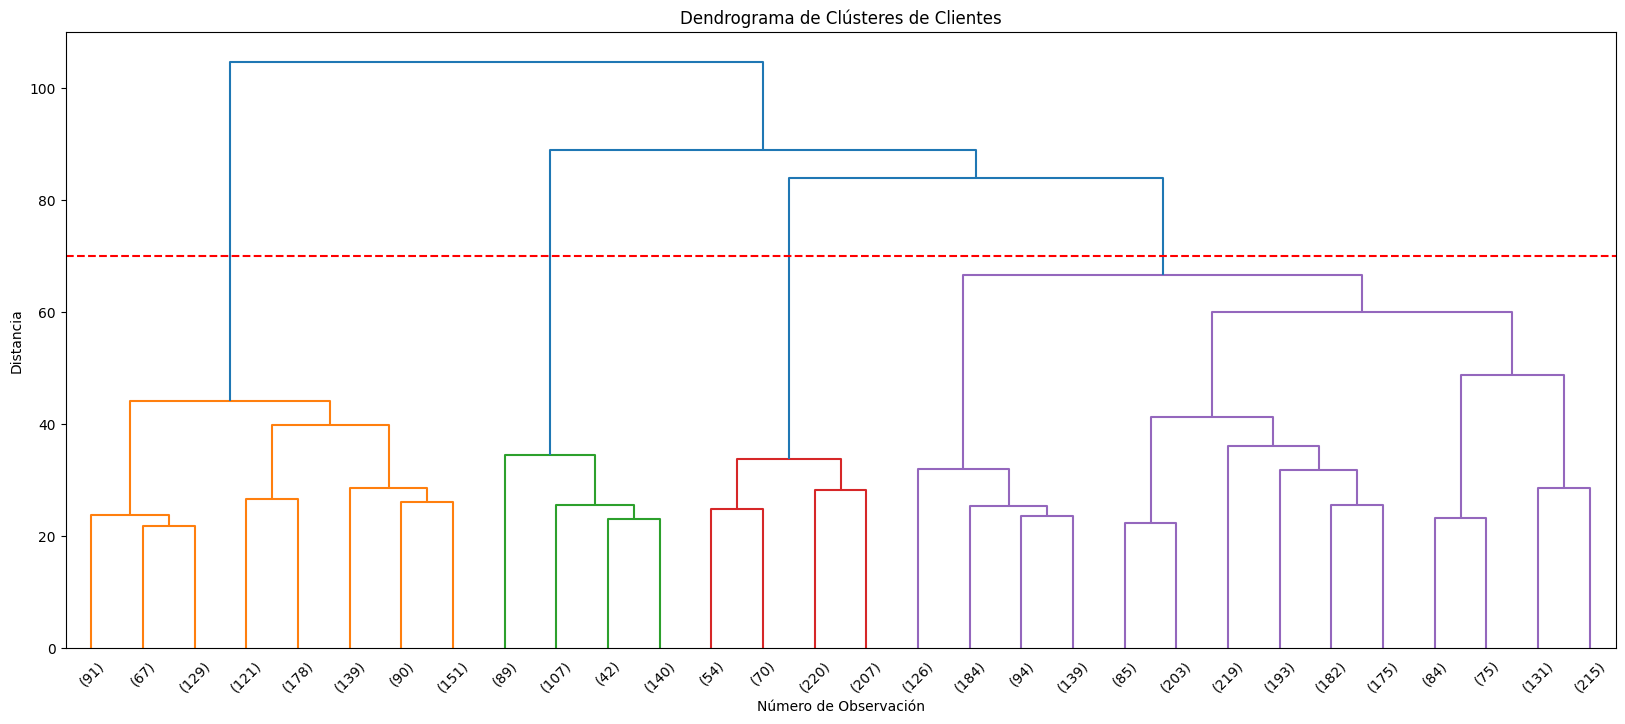

In [48]:
X = gym.drop('churn', axis=1)
scaler = StandardScaler()
X_st = scaler.fit_transform(X)
linked = linkage(X_st, method='ward')
plt.figure(figsize=(20, 8))
plt.title('Dendrograma de Clústeres de Clientes')
plt.xlabel('Número de Observación')
plt.ylabel('Distancia')
dendrogram(
    linked,
    orientation='top',
    p=30,
    truncate_mode='lastp'
)
plt.axhline(y=70, color='r', linestyle='--')
plt.show()

In [49]:
X = gym.drop('churn', axis=1)
X = pd.get_dummies(X, columns=['gender'], drop_first=True)
scaler = StandardScaler()
X_st = scaler.fit_transform(X)
X_st_df = pd.DataFrame(X_st, columns=X.columns)
n_clusters = 5
km_model = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
km_model.fit(X_st_df)
clusters = km_model.predict(X_st_df)
gym['Cluster'] = clusters
print(f"Modelo K-Means entrenado con éxito utilizando {n_clusters} clústeres.")
print("Clústeres predichos y añadidos 'Cluster'.")
print("\nPrimeras 5 filas del DataFrame:")
print(gym.head())

Modelo K-Means entrenado con éxito utilizando 5 clústeres.
Clústeres predichos y añadidos 'Cluster'.

Primeras 5 filas del DataFrame:
   gender  near_location  partner  promo_friends  phone  contract_period  \
0       1              1        1              1      0                6   
1       0              1        0              0      1               12   
2       0              1        1              0      1                1   
3       0              1        1              1      1               12   
4       1              1        1              1      1                1   

   group_visits  age  avg_additional_charges_total  month_to_end_contract  \
0             1   29                     14.227470                    5.0   
1             1   31                    113.202938                   12.0   
2             0   28                    129.448479                    1.0   
3             1   33                     62.669863                   12.0   
4             0   26    

In [50]:
cluster_means = gym.groupby('Cluster').mean().T
print(cluster_means)

Cluster                                     0           1           2  \
gender                               0.502370    0.554556    0.499422   
near_location                        0.949447    0.849269    0.937572   
partner                              0.829384    0.263217    0.737572   
promo_friends                        0.998420    0.052868    0.478613   
phone                                1.000000    1.000000    1.000000   
contract_period                      3.097946    2.606299   11.854335   
group_visits                         0.448657    0.436445    0.546821   
age                                 29.104265   30.008999   29.905202   
avg_additional_charges_total       141.774331  159.774265  163.509804   
month_to_end_contract                2.887836    2.419573   10.812717   
life_time                            3.772512    4.780652    4.677457   
avg_class_frequency_total            1.770536    2.745505    2.006405   
avg_class_frequency_current_month    1.669581    2.

La mayoria son valores menores a 1 por lo que son más propensos a irse

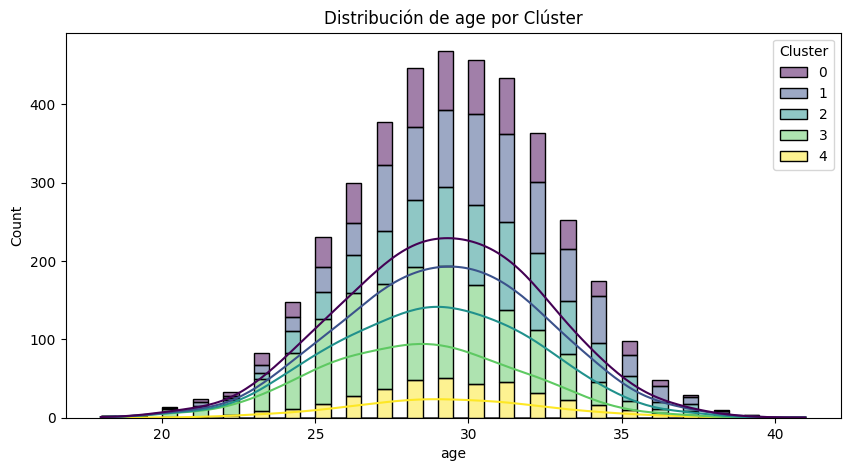

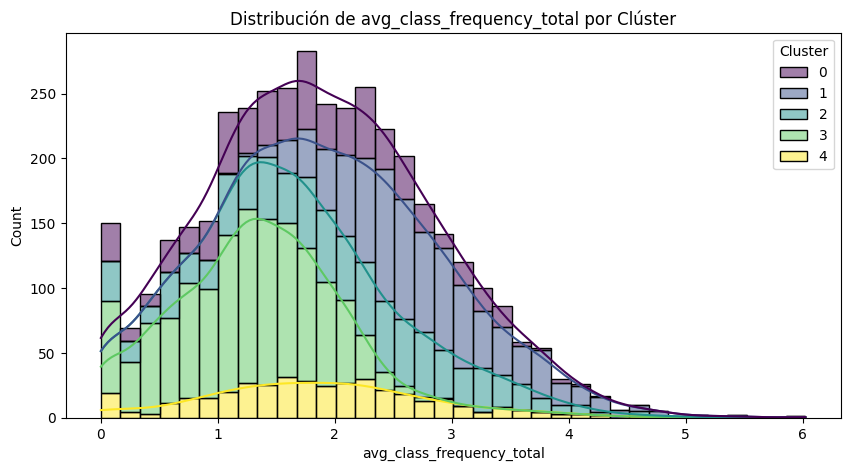

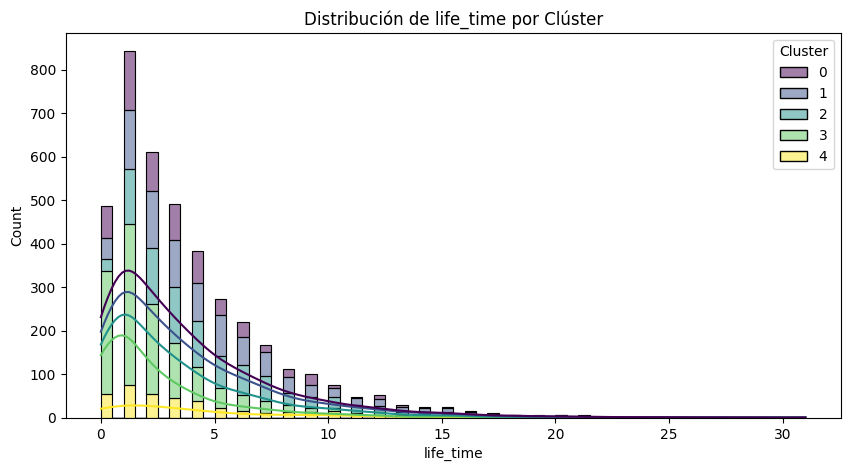

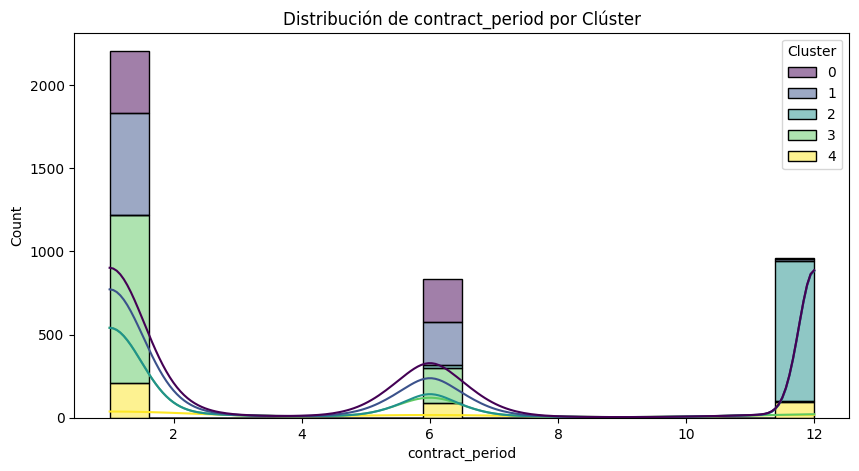

In [28]:
numerical_features = ['age', 'avg_class_frequency_total', 'life_time', 'contract_period']
for feature in numerical_features:
    plt.figure(figsize=(10, 5))
    sns.histplot(data=gym, x=feature, hue='Cluster', multiple='stack', palette='viridis', kde=True)
    plt.title(f'Distribución de {feature} por Clúster')
    plt.show()

Los clústeres son realmente distintos y separan a los clientes basándose en su duración de contrato.

In [27]:
gym['churn_numeric'] = gym['churn'].astype(int)
print("\n--- TASA DE CANCELACIÓN (CHURN RATE) POR CLÚSTER ---")
churn_rate_by_cluster = gym.groupby('Cluster')['churn_numeric'].mean().sort_values(ascending=False)
print(churn_rate_by_cluster.apply(lambda x: f'{x:.2%}'))


--- TASA DE CANCELACIÓN (CHURN RATE) POR CLÚSTER ---
Cluster
3    57.29%
4    26.68%
0    24.64%
1     9.00%
2     2.20%
Name: churn_numeric, dtype: object


<div class="alert alert-block alert-success">
<b>Comentario del revisor (1ra Iteracion)</b> <a class=“tocSkip”></a>

Bien hecho! Se nota claramente la segmentación entre los diferentes grupos ya que tienen un churn rate diferente
</div>

Los grupos de mayor cancelación son los 3.4 y 0; mientras que los grupos con menos cancelación o menos propensos a irse son los grupos 2 y 1

## Conclusiones

La mayoría de las cancelaciones ocurren durante los primeros meses de la membresía y los clientes que sobreviven esta fase temprana se vuelven altamente leales.


<div class="alert alert-block alert-success">
<b>Comentario general (1ra Iteracion)</b> <a class=“tocSkip”></a>

Muy buen trabajo, manejaste muy bien los datos previo al entrenamiento de tus modelos y analizaste muy bien los resultados.
    
Cómo recomendación es ser un poco más detallados en las conclusiones finales, un buen análisis siempre debe venir acompañado de recomendaciones que ayuden a la toma de decisiones que en este caso haz planteado sugerencias muy buenas en cuanto a los diferentes tipos de usuarios obtenidos.
    
    
Saludos!
</div>